# Entregable 2:


Notebook de Carlos Sánchez Polo

En el siguiente Notebook vamos a implementar un par de Redes Neuronales Recurrentes tipo LSTM y GRU. Probaremos con el dataset IMDB y con uno propio.

## DATASET IMBD

### RNN LSTM

In [5]:
import numpy as np
import pandas as pd

from keras import models
from keras import layers
from keras import regularizers
from keras.layers import GRU
from keras.layers import LSTM
from keras.datasets import imdb
from keras.layers import Dropout
from keras.preprocessing import sequence



In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
maxlen = 1000
x_train = sequence.pad_sequences(train_data, maxlen=maxlen)
x_test = sequence.pad_sequences(test_data, maxlen=maxlen)

In [ ]:

max_words = 10000
embedding_dim = 64


# Definir el modelo
model = models.Sequential()
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim))
model.add(LSTM(64))  # Reemplaza Flatten con LSTM
model.add(Dropout(0.5))  # Añade Dropout después de LSTM
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))  # Añade Dropout después de Dense
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,
                    train_labels,
                    epochs=15,
                    batch_size=512,
                    validation_data = (x_test, test_labels))

Epoch 1/15
49/49 [==============================] - 49s 282ms/step - loss: 1.2526 - accuracy: 0.5582 - val_loss: 0.9738 - val_accuracy: 0.7351
Epoch 2/15
49/49 [==============================] - 12s 238ms/step - loss: 0.7545 - accuracy: 0.7926 - val_loss: 0.5784 - val_accuracy: 0.8140
Epoch 3/15
49/49 [==============================] - 10s 215ms/step - loss: 0.4447 - accuracy: 0.8690 - val_loss: 0.4156 - val_accuracy: 0.8582
Epoch 4/15
49/49 [==============================] - 9s 192ms/step - loss: 0.3028 - accuracy: 0.9077 - val_loss: 0.4075 - val_accuracy: 0.8342
Epoch 5/15
49/49 [==============================] - 10s 194ms/step - loss: 0.2339 - accuracy: 0.9292 - val_loss: 0.3359 - val_accuracy: 0.8690
Epoch 6/15
49/49 [==============================] - 9s 188ms/step - loss: 0.1828 - accuracy: 0.9478 - val_loss: 0.3409 - val_accuracy: 0.8740
Epoch 7/15
49/49 [==============================] - 9s 185ms/step - loss: 0.1553 - accuracy: 0.9568 - val_loss: 0.3940 - val_accuracy: 0.8611
Ep

In [ ]:
val_acc_train = history.history['accuracy']
val_acc_test = history.history['val_accuracy']

results = model.evaluate(x_test, test_labels)

782/782 [==============================] - 11s 15ms/step - loss: 0.5533 - accuracy: 0.8558


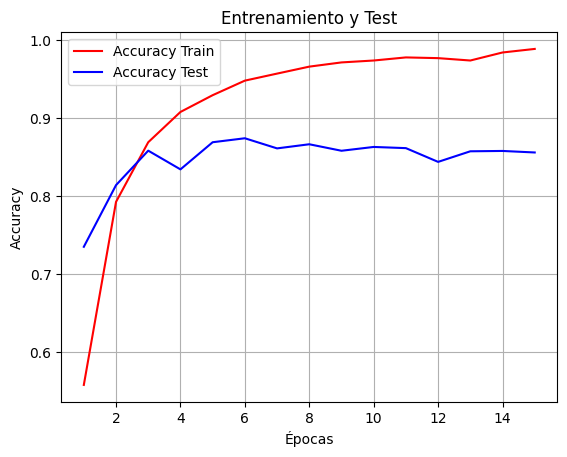

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, len(val_acc_train) + 1)
plt.plot(epochs, val_acc_train, 'r', label='Accuracy Train')
plt.plot(epochs, val_acc_test, 'b',  label='Accuracy Test')
plt.title('Entrenamiento y Test')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

### RNN LSTM (modelo más complejo)

In [ ]:
from keras.layers import Bidirectional

# Definir el modelo
model_2 = models.Sequential()
model_2.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim))
model_2.add(Bidirectional(LSTM(64, return_sequences=True)))  # Doble dirección y más unidades
model_2.add(Dropout(0.5))  # Mayor Dropout
model_2.add(LSTM(64))  # Añade otra capa LSTM
model_2.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Más unidades en capa Dense
model_2.add(Dropout(0.5))  # Mayor Dropout
model_2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Añade otra capa Dense
model_2.add(Dropout(0.5))  # Mayor Dropout
model_2.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(x_train,
                    train_labels,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_test, test_labels))


Epoch 1/8
49/49 [==============================] - 46s 792ms/step - loss: 1.8325 - accuracy: 0.5907 - val_loss: 1.3424 - val_accuracy: 0.7465
Epoch 2/8
49/49 [==============================] - 20s 402ms/step - loss: 0.9086 - accuracy: 0.8244 - val_loss: 0.6123 - val_accuracy: 0.8696
Epoch 3/8
49/49 [==============================] - 19s 393ms/step - loss: 0.4358 - accuracy: 0.9156 - val_loss: 0.4176 - val_accuracy: 0.8769
Epoch 4/8
49/49 [==============================] - 20s 418ms/step - loss: 0.2577 - accuracy: 0.9430 - val_loss: 0.3773 - val_accuracy: 0.8745
Epoch 5/8
49/49 [==============================] - 20s 404ms/step - loss: 0.1810 - accuracy: 0.9575 - val_loss: 0.4016 - val_accuracy: 0.8725
Epoch 6/8
49/49 [==============================] - 19s 395ms/step - loss: 0.1316 - accuracy: 0.9714 - val_loss: 0.4605 - val_accuracy: 0.8688
Epoch 7/8
49/49 [==============================] - 19s 392ms/step - loss: 0.1038 - accuracy: 0.9814 - val_loss: 0.5095 - val_accuracy: 0.8598
Epoch 

In [ ]:
val_acc_train_2 = history_2.history['accuracy']
val_acc_test_2 = history_2.history['val_accuracy']

results_2 = model_2.evaluate(x_test, test_labels)

782/782 [==============================] - 33s 42ms/step - loss: 0.5257 - accuracy: 0.8676


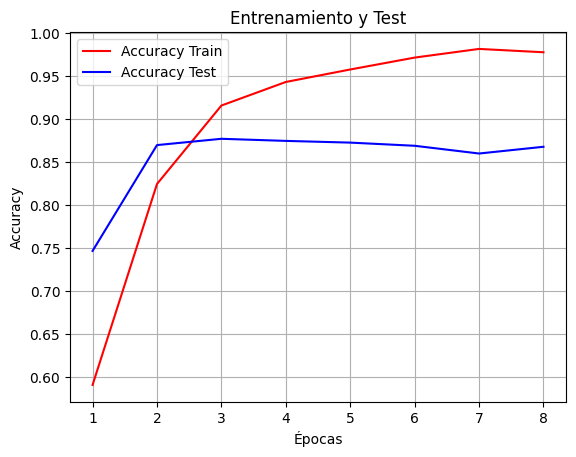

In [ ]:
epochs = range(1, len(val_acc_train_2) + 1)
plt.plot(epochs, val_acc_train_2, 'r', label='Accuracy Train')
plt.plot(epochs, val_acc_test_2,  'b', label='Accuracy Test')
plt.title('Entrenamiento y Test')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

### RNN GRU

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
maxlen = 1000
x_train = sequence.pad_sequences(train_data, maxlen=maxlen)
x_test = sequence.pad_sequences(test_data, maxlen=maxlen)

In [ ]:
max_words = 10000
embedding_dim = 64


In [ ]:
model_3 = models.Sequential()
model_3.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim))
model_3.add(Bidirectional(GRU(64, return_sequences=True)))
model_3.add(Dropout(0.5))
model_3.add(GRU(64, return_sequences=False))  # Cambia a return_sequences=False
model_3.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(Dropout(0.5))
model_3.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(Dropout(0.5))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(x_train,
                    train_labels,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_test, test_labels))

Epoch 1/8
49/49 [==============================] - 26s 421ms/step - loss: 1.8336 - accuracy: 0.5510 - val_loss: 1.3320 - val_accuracy: 0.6931
Epoch 2/8
49/49 [==============================] - 18s 380ms/step - loss: 0.9666 - accuracy: 0.7751 - val_loss: 0.7719 - val_accuracy: 0.7719
Epoch 3/8
49/49 [==============================] - 19s 393ms/step - loss: 0.5714 - accuracy: 0.8515 - val_loss: 0.5389 - val_accuracy: 0.8236
Epoch 4/8
49/49 [==============================] - 19s 396ms/step - loss: 0.3744 - accuracy: 0.8934 - val_loss: 0.4218 - val_accuracy: 0.8520
Epoch 5/8
49/49 [==============================] - 19s 396ms/step - loss: 0.2688 - accuracy: 0.9255 - val_loss: 0.4303 - val_accuracy: 0.8401
Epoch 6/8
49/49 [==============================] - 19s 386ms/step - loss: 0.2134 - accuracy: 0.9437 - val_loss: 0.3892 - val_accuracy: 0.8581
Epoch 7/8
49/49 [==============================] - 19s 380ms/step - loss: 0.1772 - accuracy: 0.9559 - val_loss: 0.3973 - val_accuracy: 0.8546
Epoch 

In [ ]:
val_acc_train_3 = history_3.history['accuracy']
val_acc_test_3 = history_3.history['val_accuracy']

results_3 = model_3.evaluate(x_test, test_labels)

782/782 [==============================] - 31s 39ms/step - loss: 0.4191 - accuracy: 0.8577


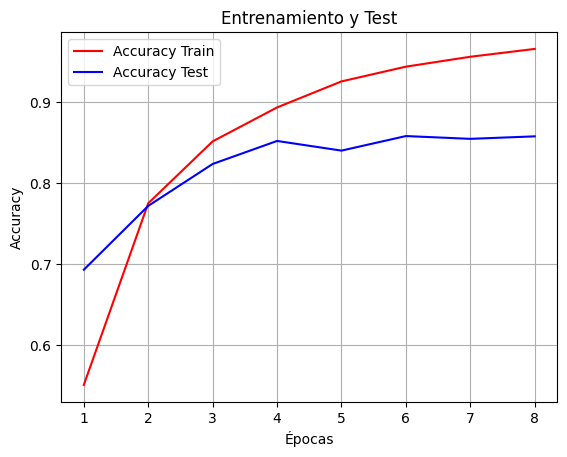

In [ ]:
epochs = range(1, len(val_acc_train_3) + 1)
plt.plot(epochs, val_acc_train_3, 'r', label='Accuracy Train')
plt.plot(epochs, val_acc_test_3,  'b', label='Accuracy Test')
plt.title('Entrenamiento y Test')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

## DATASET PROPIO

### LSTM

In [1]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
!wget https://s3.amazonaws.com/fast-ai-nlp/yelp_review_full_csv.tgz

--2024-04-15 20:59:25--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_full_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.98.48, 52.216.60.216, 16.182.103.128, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.98.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196146755 (187M) [application/x-tar]
Saving to: ‘yelp_review_full_csv.tgz.2’

yelp_review_full_cs 100%[===================>] 187.06M  46.4MB/s    in 4.0s    

2024-04-15 20:59:29 (46.6 MB/s) - ‘yelp_review_full_csv.tgz.2’ saved [196146755/196146755]



In [3]:
 !tar -xvzf yelp_review_full_csv.tgz

yelp_review_full_csv/
yelp_review_full_csv/train.csv
yelp_review_full_csv/readme.txt
yelp_review_full_csv/test.csv


In [6]:
train_yelp = pd.read_csv('yelp_review_full_csv/train.csv', header=None)
test_yelp  = pd.read_csv('yelp_review_full_csv/test.csv', header=None)
# Mezclar los datos
train_yelp = train_yelp.sample(frac=1).reset_index(drop=True)
test_yelp = test_yelp.sample(frac=1).reset_index(drop=True)

train_yelp.head()
#test_yelp.head()


,0,1
0,2,I'm very surprised that after 20+ reviews this...
1,5,These guys rock for sure! I had a 3inch lift i...
2,2,"Okay hotel, but bad, loud music at the pool ru..."
3,5,While the Royal Museum in Chambers Street is b...
4,3,We've visited this place a few times in the pa...


In [7]:
# Separar características (data) y etiquetas (labels) para train
train_labels_4 = train_yelp.iloc[:, 0]  # La primera columna contiene las etiquetas
train_data_4 = train_yelp.iloc[:, 1]  # Las características están en todas las columnas excepto la primera

# Separar características (data) y etiquetas (labels) para test
test_labels_4 = test_yelp.iloc[:, 0]  # La primera columna contiene las etiquetas
test_data_4 = test_yelp.iloc[:, 1]  # Las características están en todas las columnas excepto la primera

# Verificar el tamaño de las muestras
print("Tamaño del conjunto de entrenamiento (data):", len(train_data_4))
print("Tamaño del conjunto de entrenamiento (labels):", len(train_labels_4))
print("Tamaño del conjunto de prueba (data):", len(test_data_4))
print("Tamaño del conjunto de prueba (labels):", len(test_labels_4))

Tamaño del conjunto de entrenamiento (data): 650000
Tamaño del conjunto de entrenamiento (labels): 650000
Tamaño del conjunto de prueba (data): 50000
Tamaño del conjunto de prueba (labels): 50000


Entre otras cosas, a continuación vamos a reclasificar las reseñas en buenas (1) mediocres (2,3,4) y buenas (5), pasando de 5 a 3 clases. Esto se hacer por motivos de cómputo, pues es una RNN con análisis de sentimientos/sensaciones. Usamos palabras clave de reseñas para determinar que tan bueno es algo, siendo mucho más dificil atinar con 5 que con 3 clases. Al tener recursos limitados simplificamos un poco el proceso.

In [8]:
# Reemplazar las clases 2, 3 y 4 por la nueva clase 2, y la clase 5 por la nueva clase 3
train_labels_4_replaced = train_labels_4.replace({2: 2, 3: 2, 4: 2, 5: 3})
test_labels_4_replaced = test_labels_4.replace({2: 2, 3: 2, 4: 2, 5: 3})


# Convertir train_labels_4_replaced a one-hot encoding
train_labels_4_encoded = to_categorical(train_labels_4_replaced - 1)
# Convertir test_labels_4_replaced a one-hot encoding
test_labels_4_encoded = to_categorical(test_labels_4_replaced - 1)



In [9]:
print(np.unique(train_labels_4_replaced))
print(np.unique(test_labels_4_replaced))
print(np.unique(train_labels_4_encoded))
print(np.unique(test_labels_4_encoded))


[1 2 3]
[1 2 3]
[0. 1.]
[0. 1.]


In [10]:
maxlen_4 = 80
max_num_words= 500
ignore_top_words= 10

# Inicializa un Tokenizer
tokenizer = Tokenizer(num_words=max_num_words)

# Ajusta el Tokenizer a tus datos de entrenamiento
tokenizer.fit_on_texts(train_data_4)

# Get the word counts
word_counts = tokenizer.word_counts

# Sort the word counts and get the 10 most common words
most_common_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:ignore_top_words]
most_common_words = [word for word, count in most_common_words]

# Adjust the word index of the tokenizer
for word in most_common_words:
    del tokenizer.word_index[word]
    del tokenizer.word_docs[word]
    del tokenizer.word_counts[word]

# Now you can convert your texts into sequences
train_data_4_token = tokenizer.texts_to_sequences(train_data_4)
test_data_4_token  = tokenizer.texts_to_sequences(test_data_4)

# Ahora puedes aplicar sequence.pad_sequences
x_train_4 = sequence.pad_sequences(train_data_4_token, maxlen=maxlen_4)
x_test_4 = sequence.pad_sequences(test_data_4_token, maxlen=maxlen_4)

In [11]:
max_words = 500
embedding_dim = 50
num_classes = 3

# Definir el modelo
model_4 = models.Sequential()
model_4.add(layers.Embedding(input_dim=maxlen_4, output_dim=embedding_dim))
model_4.add(LSTM(64))  # Reemplaza Flatten con LSTM
model_4.add(Dropout(0.3))  # Añade Dropout después de LSTM
model_4.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_4.add(Dropout(0.3))
model_4.add(layers.Dense(num_classes, activation='softmax'))

# Compilar el modelo
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model_4.summary()

history_4 = model_4.fit(x_train_4,
                        train_labels_4_encoded,
                        epochs=20,
                        batch_size=16384,
                        validation_data=(x_test_4, test_labels_4_encoded))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          4000      
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 42147 (164.64 KB)
Trainable params: 42147 

In [14]:
val_acc_train_4 = history_4.history['accuracy']
val_acc_test_4 = history_4.history['val_accuracy']

results_4 = model_4.evaluate(x_test_4, test_labels_4_encoded)

1563/1563 [==============================] - 10s 6ms/step - loss: 0.7555 - accuracy: 0.6653


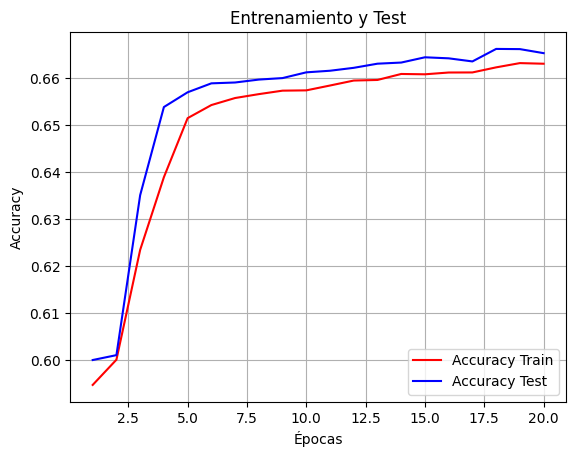

In [16]:
import matplotlib.pyplot as plt
epochs = range(1, len(val_acc_train_4) + 1)
plt.plot(epochs, val_acc_train_4, 'r', label='Accuracy Train')
plt.plot(epochs, val_acc_test_4,  'b', label='Accuracy Test')
plt.title('Entrenamiento y Test (LSTM)')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

### GRU

In [17]:
# Definir el modelo
model_5 = models.Sequential()
model_5.add(layers.Embedding(input_dim=maxlen_4, output_dim=embedding_dim))
model_5.add(GRU(64))
model_5.add(Dropout(0.3))
model_5.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_5.add(Dropout(0.3))
model_5.add(layers.Dense(num_classes, activation='softmax'))

# Compilar el modelo
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model_5.summary()

history_5 = model_5.fit(x_train_4,
                        train_labels_4_encoded,
                        epochs=20,
                        batch_size=16384,
                        validation_data=(x_test_4, test_labels_4_encoded))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          4000      
                                                                 
 gru (GRU)                   (None, 64)                22272     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 34979 (136.64 KB)
Trainable params: 3497

In [19]:
val_acc_train_5 = history_5.history['accuracy']
val_acc_test_5 = history_5.history['val_accuracy']

results_5 = model_5.evaluate(x_test_4, test_labels_4_encoded)

1563/1563 [==============================] - 14s 9ms/step - loss: 0.7576 - accuracy: 0.6641


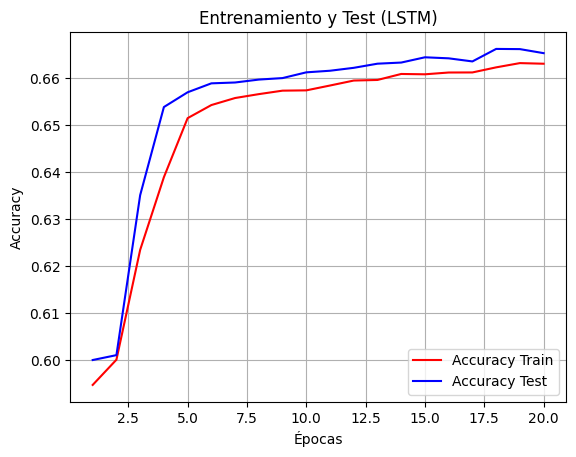

In [20]:
import matplotlib.pyplot as plt
epochs = range(1, len(val_acc_train_4) + 1)
plt.plot(epochs, val_acc_train_4, 'r', label='Accuracy Train')
plt.plot(epochs, val_acc_test_4,  'b', label='Accuracy Test')
plt.title('Entrenamiento y Test (LSTM)')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

## NOTA:

Aunque los modelos aún tienen un margen de mejora considerable (idealmente buscaría una precisión del 90% o más), me he quedado sin capacidad de computo con GPU en la nube y debo parar aquí.

Carlos Sánchez Polo